**Pyber Ride Sharing**

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
path1 = 'Resources/city_data.csv'
path2 = 'Resources/ride_data.csv'
city = pd.read_csv(path1, low_memory=False)
rides = pd.read_csv(path2, low_memory=False)
#Port James double. suburban, total 18 dr

**Create an organized DF from the city file and get Total Number of Drivers Per City and
City Type (Urban, Suburban, Rural)**

In [54]:
city_group = city.groupby(['city', 'type'])
city_group_df = city_group.sum()
struct_city = city_group_df.reset_index()
#struct_city.head()

**Get Average Fare ($) Per City**

In [55]:
rides_gr = rides.groupby('city')
fare_df = rides_gr.mean()
fare_df.drop('ride_id', axis=1, inplace=True)
fare = fare_df.reset_index()
#fare.head()

**Get Total Number of Rides Per City**

In [56]:
total_rides = rides_gr.count()
total_rides.drop('fare', axis=1, inplace=True)
total_rides.drop('date', axis=1, inplace=True)
tot_rides = total_rides.reset_index()
#tot_rides.head()

**Merge all 3 DF in one**

In [142]:
merge1 = pd.merge(struct_city, fare, on='city')
allmerged = pd.merge(merge1, tot_rides, on='city')
allmerged.drop('city', axis=1, inplace=True)
allmerged.columns = ['City Type', 'Driver Count', 'Average Fare ($)', 'Number of Rides']
allmerged = allmerged.assign(Color= '')
#allmerged['Average Fare'] = allmerged['Average Fare'].map("{:,.2f}".format)
allmerged.head()

,City Type,Driver Count,Average Fare ($),Number of Rides,Color
0,Urban,21,23.928710,31,
1,Urban,67,20.609615,26,
2,Suburban,16,37.315556,9,
3,Urban,21,23.625000,22,
4,Urban,49,21.981579,19,


In [154]:
# Add copy of allmerged and work with it
x = 0
for i in allmerged['City Type']:
    if (i == 'Urban'):
        allmerged.set_value(x, 'Color', 'red')
    elif (i == 'Suburban'):
        allmerged.set_value(x, 'Color', 'yellow')
    else:
        allmerged.set_value(x, 'Color', 'green')
    x +=1

/Users/sonik/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/sonik/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/sonik/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [155]:
allmerged.head()
# Find out why color doesn't change

,City Type,Driver Count,Average Fare ($),Number of Rides,Color
0,Urban,21,23.928710,31,orange
1,Urban,67,20.609615,26,orange
2,Suburban,16,37.315556,9,blue
3,Urban,21,23.625000,22,orange
4,Urban,49,21.981579,19,orange


**Create a plot**

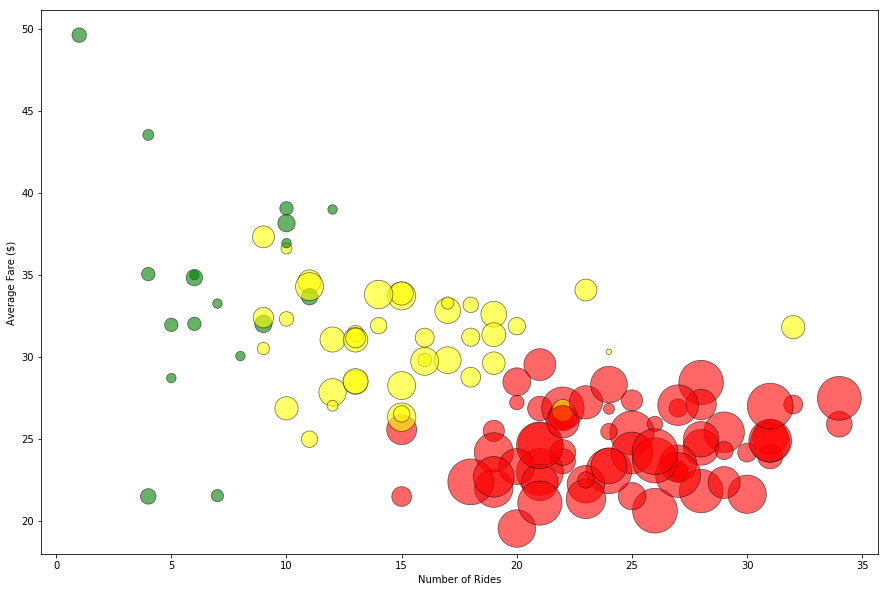

In [160]:
bubble = allmerged.plot(kind='scatter', x='Number of Rides', y='Average Fare ($)', s=(allmerged['Driver Count']*30),
                        c=allmerged['Color'], alpha=0.6, edgecolors="black", linewidth=0.7, figsize=(15,10))

In [84]:
urban = allmerged.loc[allmerged['City Type'] == 'Urban',:]
suburban = allmerged.loc[allmerged['City Type'] == 'Suburban',:]
rural = allmerged.loc[allmerged['City Type'] == 'Rural',:]

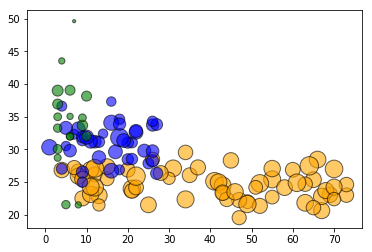

In [100]:
import seaborn as sns
plt.scatter(urban['Driver Count'], urban['Average Fare ($)'], s=(urban['Number of Rides']*10), alpha=0.6,
            edgecolors="black", linewidth=1, color='orange')
plt.scatter(suburban['Driver Count'], suburban['Average Fare ($)'], s=(suburban['Number of Rides']*10), alpha=0.6,
            edgecolors="black", linewidth=1, color='blue')
plt.scatter(rural['Driver Count'], rural['Average Fare ($)'], s=(rural['Number of Rides']*10), alpha=0.6,
            edgecolors="black", linewidth=1, color='green')